In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv('movie_review.csv')
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [15]:
df = df.drop(['fold_id','cv_tag','html_id', 'sent_id'], axis=1)

display(df)

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [16]:
df = df.rename(columns={"tag": "review"})
display(df)

,text,review
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [17]:
df_Neg = df[df['review']=='neg']["text"]
display(df_Neg)

32937    plot : two teen couples go to a church party ,...
32938                          they get into an accident .
32939    one of the guys dies , but his girlfriend cont...
32940                                    what's the deal ?
32941         watch the movie and " sorta " find out . . .
                               ...                        
64715    that lack of inspiration can be traced back to...
64716    like too many of the skits on the current inca...
64717    after watching one of the " roxbury " skits on...
64718     bump unsuspecting women , and . . . that's all .
64719    after watching _a_night_at_the_roxbury_ , you'...
Name: text, Length: 31783, dtype: object

In [18]:
df_Pos = df[df['review']=='pos']["text"]
display(df_Pos)

0        films adapted from comic books have had plenty...
1        for starters , it was created by alan moore ( ...
2        to say moore and campbell thoroughly researche...
3        the book ( or " graphic novel , " if you will ...
4        in other words , don't dismiss this film becau...
                               ...                        
32932    it's a quick , straight shot to the movie's end .
32933    in terms of overall quality , i would compare ...
32934    both films are well made with interesting stor...
32935    but neither film really felt like it capitaliz...
32936    nevertheless , i look forward to niccol's next...
Name: text, Length: 32937, dtype: object

In [19]:
Pos = " ".join(df[df['review']=='pos']["text"]).split()
Pos

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 ',',
 'whether',
 "they're",
 'about',
 'superheroes',
 '(',
 'batman',
 ',',
 'superman',
 ',',
 'spawn',
 ')',
 ',',
 'or',
 'geared',
 'toward',
 'kids',
 '(',
 'casper',
 ')',
 'or',
 'the',
 'arthouse',
 'crowd',
 '(',
 'ghost',
 'world',
 ')',
 ',',
 'but',
 "there's",
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 '.',
 'for',
 'starters',
 ',',
 'it',
 'was',
 'created',
 'by',
 'alan',
 'moore',
 '(',
 'and',
 'eddie',
 'campbell',
 ')',
 ',',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 "'80s",
 'with',
 'a',
 '12-part',
 'series',
 'called',
 'the',
 'watchmen',
 '.',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting

In [20]:
import nltk
adj_pos = []
tagged = nltk.pos_tag(Pos)
for i in tagged:
    if i[1][0] == "J":
        adj_pos+=[i[0]]
print(adj_pos)

['comic', 'ghost', 'comic', 'whole', 'new', '12-part', 'little', 'graphic', 'more', 'other', 'whole', 'comic', 'allen', 'ludicrous', 'violent', 'east', 'sooty', 'little', 'nervous', 'mysterious', 'surgical', 'first', 'robbie', 'johnny', 'prophetic', 'copious', 'mary', 'gruesome', "don't", 'i', 'other', 'unique', 'interesting', 'comic', 'vertical', 'rafael', 'good', 'funny', 'capable', 'such', 'ghastly', 'steve', "hell's", 'dark', 'bleak', 'surprising', 'tim', "don't", 'victorian-era', 'flashy', 'crazy', 'twin', 'black-and-white', 'comic', 'original', 'solid', 'strong', 'british', 'joe', 'great', 'big', 'graham', 'first', 'irish', 'half', 'bad', 'good', 'strong', 'suspect', 'critical', "films'", 'high', 'reese', 'current', 'simple', 'washington', 'high', 'student', 'reese', 'over-achiever', 'high', 'm', 'megalomaniac', 'popular-but-slow', "paul's", 'nihilistic', 'personal', 'dark', 'such', 'sleeper', 'low', 'enthusiastic', 'negative', 'likely', 'good', 'disappointing', 'significant', 'f

In [21]:
from nltk.probability import FreqDist
fdist = FreqDist(adj_pos)
fdist.most_common(25)

[('"', 1450),
 ('good', 1175),
 ('other', 1054),
 ('more', 845),
 ('i', 812),
 ('first', 798),
 ('many', 780),
 ('great', 743),
 ('new', 718),
 ('best', 718),
 ('little', 699),
 ('most', 635),
 ('much', 596),
 ('such', 543),
 ('own', 499),
 ('few', 494),
 ('same', 470),
 ("it's", 446),
 ('real', 445),
 ('young', 437),
 ('big', 430),
 ('last', 420),
 ('old', 378),
 ('original', 356),
 ('bad', 355)]

In [22]:
adj_pos_over = {'"','i', "it's"}
adj_pos_new = [j for j in adj_pos if j not in adj_pos_over]
print(adj_pos_new)

['comic', 'ghost', 'comic', 'whole', 'new', '12-part', 'little', 'graphic', 'more', 'other', 'whole', 'comic', 'allen', 'ludicrous', 'violent', 'east', 'sooty', 'little', 'nervous', 'mysterious', 'surgical', 'first', 'robbie', 'johnny', 'prophetic', 'copious', 'mary', 'gruesome', "don't", 'other', 'unique', 'interesting', 'comic', 'vertical', 'rafael', 'good', 'funny', 'capable', 'such', 'ghastly', 'steve', "hell's", 'dark', 'bleak', 'surprising', 'tim', "don't", 'victorian-era', 'flashy', 'crazy', 'twin', 'black-and-white', 'comic', 'original', 'solid', 'strong', 'british', 'joe', 'great', 'big', 'graham', 'first', 'irish', 'half', 'bad', 'good', 'strong', 'suspect', 'critical', "films'", 'high', 'reese', 'current', 'simple', 'washington', 'high', 'student', 'reese', 'over-achiever', 'high', 'm', 'megalomaniac', 'popular-but-slow', "paul's", 'nihilistic', 'personal', 'dark', 'such', 'sleeper', 'low', 'enthusiastic', 'negative', 'likely', 'good', 'disappointing', 'significant', 'few', 

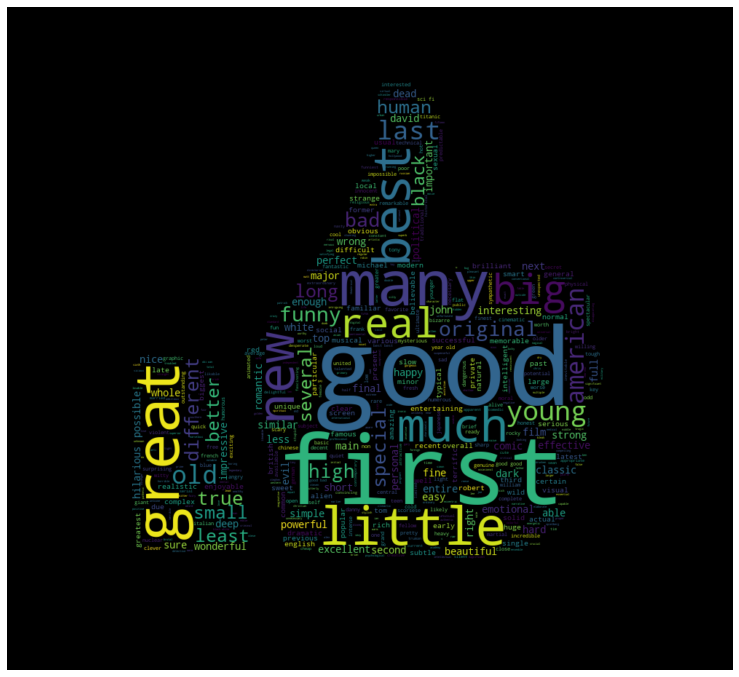

In [23]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(adj_pos)

mask=np.array(Image.open('like3.png'))
wordcloud = WordCloud(max_words=500,background_color="black",mask=mask).generate(str(text_raw))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
Neg = " ".join(df[df['review']=='neg']["text"]).split()
len(Neg)


705630

In [25]:
adj_neg = []
tagged = nltk.pos_tag(Neg)
for i in tagged:
    if i[1][0] == "J":
        adj_neg+=[i[0]]
print(adj_neg)

['mind-fuck', 'teen', 'cool', 'bad', 'such', 'good', 'bad', 'neat', 'main', 'normal', '"', 'dead', 'dead', 'strange', 'weird', 'most', "don't", 'same', 'i', "film's", 'biggest', 'big', 'final', 'sad', 'most', 'half-way', 'little', 'more', 'bottom', 'sure', 'secret', 'i', 'melissa', 'plain', 'lazy', 'different', 'further', 'pretty', 'decent', 'teen', 'mind-fuck', 'i', 'little', 'more', 'good', 'most', 'wes', 'exact', 'same', 'american', 'new', 'biggest', 'own', 'entire', 'overall', "it's", 'pretty', 'most', 'pretty', 'teen', 'slasher', 'hot', "where's", 'elm', 'happy', 'quick', 'head', 'deserted', 'russian', 'little', 'few', 'empty', 'big', 'flashy', 'donald', "let's", 'below', 'likely', 'halloween', 'real', 'stan', "winston's", 'schnazzy', 'occasional', 'good', "someone's", 'sunken', 'jaded', 'timex', 'late', 'same', 'reformed', 'wrong', 'quick', 'cool', 'nice', 'like', 'cool', 'first', 'fifteen', 'apparent', 'complete', 'nice', "isn't", 'hour-long', 'single', 'most', 'spectacular', 'o

In [27]:
from nltk.probability import FreqDist
fdist = FreqDist(adj_neg)
fdist.most_common(25)

[('"', 1742),
 ('good', 1103),
 ('bad', 1017),
 ('i', 961),
 ('other', 870),
 ('more', 751),
 ('first', 690),
 ('little', 644),
 ('much', 622),
 ('new', 557),
 ('big', 537),
 ('many', 487),
 ('such', 471),
 ('few', 470),
 ('most', 425),
 ('best', 422),
 ('last', 409),
 ('least', 407),
 ('only', 406),
 ('real', 404),
 ('same', 399),
 ('great', 395),
 ('funny', 379),
 ("it's", 351),
 ('old', 348)]

На удивление слово "good" оказалось также популярно в негативных отзывах, как и в позитивных, тогда я решила просмотреть весь текст нагативных отзывов и посмотреть, в каком случае пишут это слово.

In [29]:
df_Neg.tolist()

['plot : two teen couples go to a church party , drink and then drive .',
 'they get into an accident .',
 'one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares .',
 "what's the deal ?",
 'watch the movie and " sorta " find out . . .',
 'critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package .',
 "which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly .",
 'they seem to have taken this pretty neat concept , but executed it terribly .',
 'so what are the problems with the movie ?',
 "well , its main problem is that it's simply too jumbled .",
 'it starts off " normal " but then downshifts into this " fantasy " world in which you , as

После прочтения данных рецензий стало понятно, что чаще всего слово "good" употребляется либо с отрицательной частицей, либо в смысле достаточно, например, актеры играли достаточно хорошо, но потом следует какое-то отрицательное прилагательное, или задумка была хороша, но... 
Поэтому для более наглядной визуализации, я решила убрать слово "good".

In [32]:
adj_over = {'good','"','i'}
adj_neg_new = [j for j in adj_neg if j not in adj_over]
print(adj_neg_new)

['mind-fuck', 'teen', 'cool', 'bad', 'such', 'bad', 'neat', 'main', 'normal', 'dead', 'dead', 'strange', 'weird', 'most', "don't", 'same', "film's", 'biggest', 'big', 'final', 'sad', 'most', 'half-way', 'little', 'more', 'bottom', 'sure', 'secret', 'melissa', 'plain', 'lazy', 'different', 'further', 'pretty', 'decent', 'teen', 'mind-fuck', 'little', 'more', 'most', 'wes', 'exact', 'same', 'american', 'new', 'biggest', 'own', 'entire', 'overall', "it's", 'pretty', 'most', 'pretty', 'teen', 'slasher', 'hot', "where's", 'elm', 'happy', 'quick', 'head', 'deserted', 'russian', 'little', 'few', 'empty', 'big', 'flashy', 'donald', "let's", 'below', 'likely', 'halloween', 'real', 'stan', "winston's", 'schnazzy', 'occasional', "someone's", 'sunken', 'jaded', 'timex', 'late', 'same', 'reformed', 'wrong', 'quick', 'cool', 'nice', 'like', 'cool', 'first', 'fifteen', 'apparent', 'complete', 'nice', "isn't", 'hour-long', 'single', 'most', 'spectacular', 'only', 'unscathed', 'giovanni', 'only', 'wort

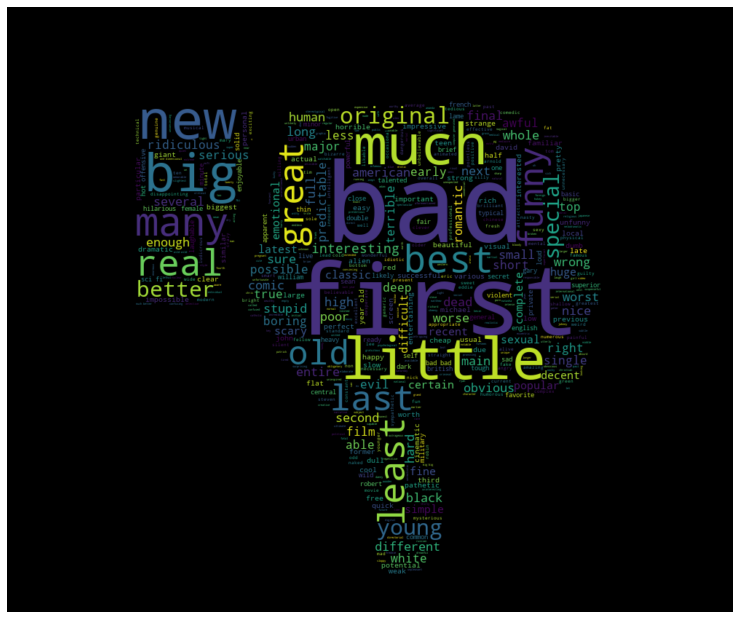

In [35]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

text_raw = " ".join(adj_neg_new)

mask=np.array(Image.open('dislike1.png'))
wordcloud = WordCloud(max_words=500,background_color="black",mask=mask).generate(str(text_raw))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()